# Model 3: Sarcastic Comments Detection using BERT

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preparation

In [12]:
df = pd.read_csv('../../data/Sarcastic_Comments_REDDIT/train-balanced-sarcasm.csv')
df = df[["label", "comment"]]
df.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


In [14]:
df["label"].value_counts()

label
0    505413
1    505413
Name: count, dtype: int64

In [15]:
df.isnull().sum()

label       0
comment    55
dtype: int64

In [16]:
df = df.dropna()

## Visualizations

### Word Clouds for Each Label

In [21]:
from wordcloud import WordCloud
from collections import Counter
import nltk

In [20]:
sarcastic_comments = " ".join(df[df['label'] == 0]['comment'].astype(str).values)
non_sarcastic_comments = " ".join(df[df['label'] == 1]['comment'].astype(str).values)

In [22]:
wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(sarcastic_comments)
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(non_sarcastic_comments)

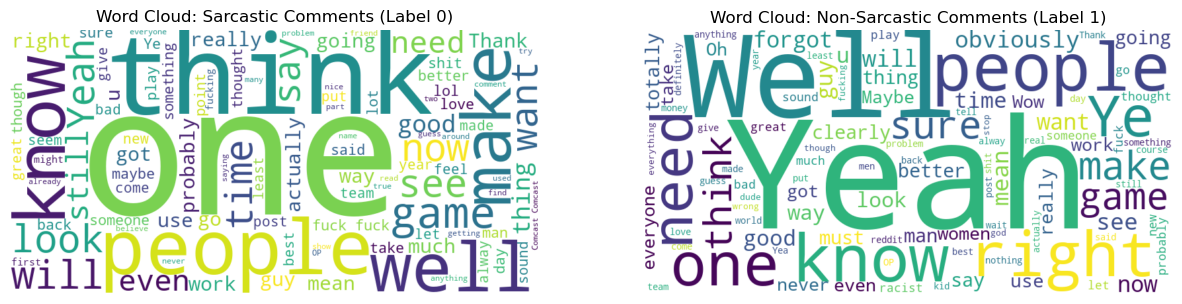

In [23]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Sarcastic Comments (Label 0)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Non-Sarcastic Comments (Label 1)")

plt.show()

On the cloud of sarcastic comments, we couldn't see words which are very common in sarcastic comments. So it makes very hard for model to understand the context of the comment. But one big cons of our dataset is that it is very large and contains with more than 1 million comments.

### Top Frequent Words Analysis

In [24]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def get_top_words(text, num=20):
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return Counter(words).most_common(num)

sarcastic_top = get_top_words(sarcastic_comments)
non_sarcastic_top = get_top_words(non_sarcastic_comments)

print("Top 20 words in sarcastic comments:")
print(sarcastic_top)
print("\nTop 20 words in non-sarcastic comments:")
print(non_sarcastic_top)

Top 20 words in sarcastic comments:
[('like', 28477), ('would', 19385), ('get', 17159), ("i'm", 16080), ('one', 15387), ('think', 14726), ('people', 13732), ("that's", 11297), ('good', 10020), ('fuck', 9643), ('really', 9608), ('know', 9585), ('even', 8565), ('still', 8364), ('make', 8150), ('see', 8014), ('could', 7977), ('got', 7540), ('time', 7449), ('well', 7270)]

Top 20 words in non-sarcastic comments:
[('like', 25030), ('people', 17996), ('get', 16899), ('yeah,', 16386), ('would', 15474), ('yeah', 15053), ("that's", 14657), ("i'm", 14417), ('well', 12201), ('one', 11954), ('know', 11731), ('sure', 11098), ('good', 11078), ("can't", 10475), ('think', 9210), ('make', 9182), ('really', 8525), ('never', 8414), ("he's", 8076), ('need', 8015)]


Like in the previos plot, that words doesn't have strong attitude to sarcasm.

Try to find most frequent phrases in the dataset.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_top_bigrams(data_subset, label_name, top_n=20):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
    X = vectorizer.fit_transform(data_subset['comment'])
    bigram_counts = np.array(X.sum(axis=0)).flatten()
    bigrams = vectorizer.get_feature_names_out()
    bigram_freq = pd.DataFrame({'phrase': bigrams, 'count': bigram_counts})
    top_bigrams = bigram_freq.sort_values(by='count', ascending=False).head(top_n)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='count', y='phrase', data=top_bigrams, palette='viridis',hue='count')
    plt.title(f'Top {top_n} Most Frequent Bigrams in {label_name} Comments')
    plt.xlabel('Frequency')
    plt.ylabel('Phrase')
    plt.tight_layout()
    plt.show()

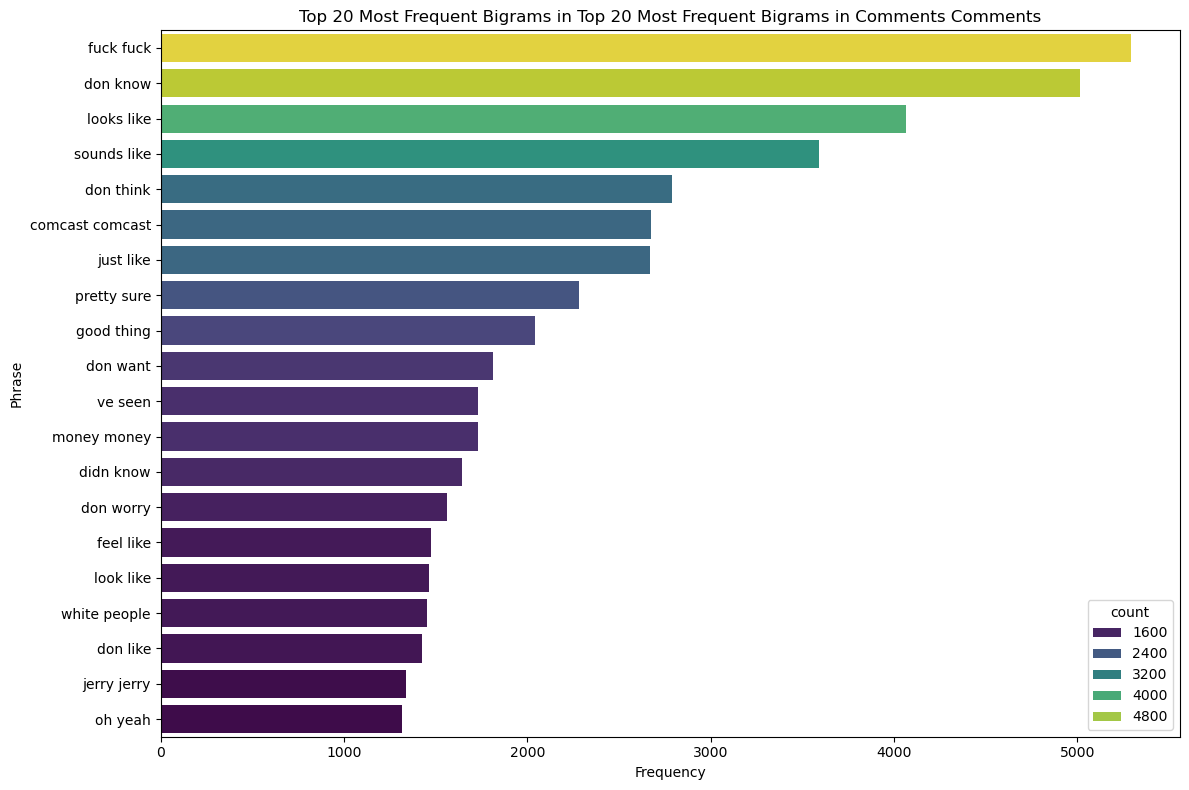

In [30]:
plot_top_bigrams(df, label_name="Top 20 Most Frequent Bigrams in Comments")

This graph reveals more information. We can note some phrases which can be more common in sarcastic comments, there are also offensive words which can be used in sarcastic comments. Let's try to build similar plots but now for 2 labels separately.

In [31]:
df_sarcastic = df[df['label'] == 0]
df_non_sarcastic = df[df['label'] == 1]

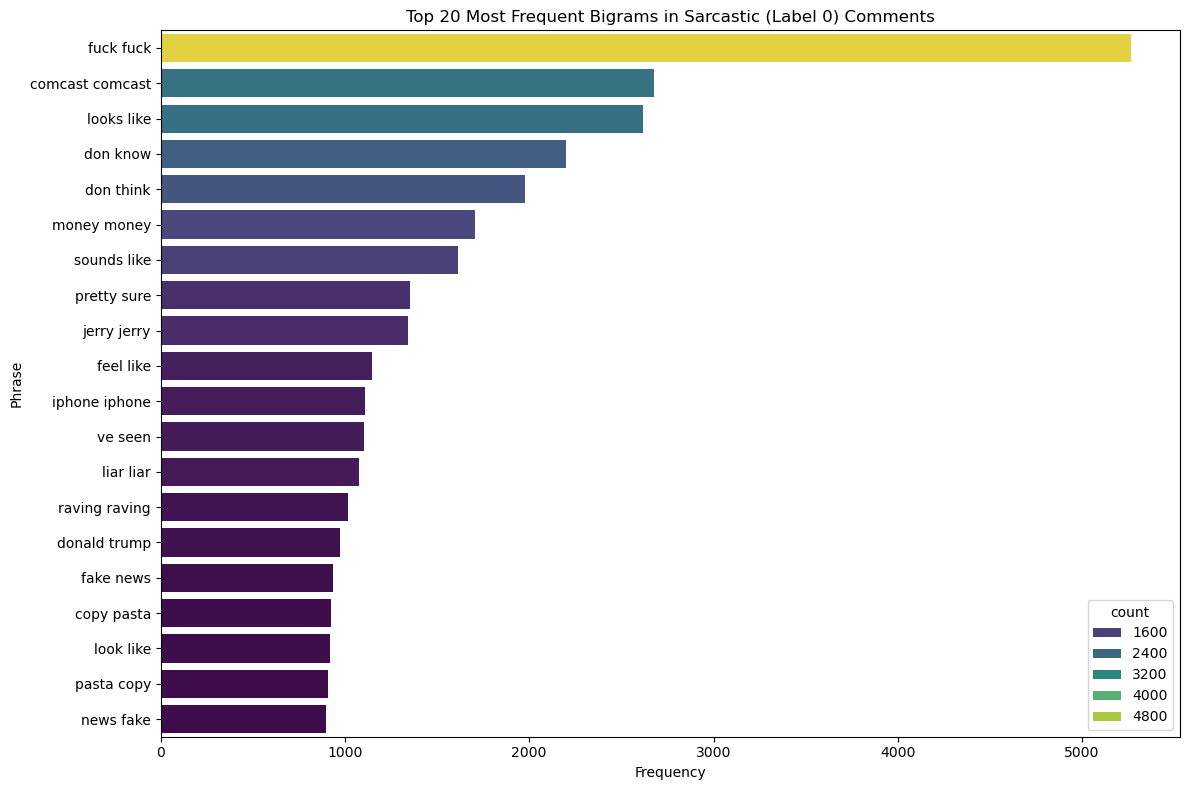

In [32]:
plot_top_bigrams(df_sarcastic, label_name="Sarcastic (Label 0)")

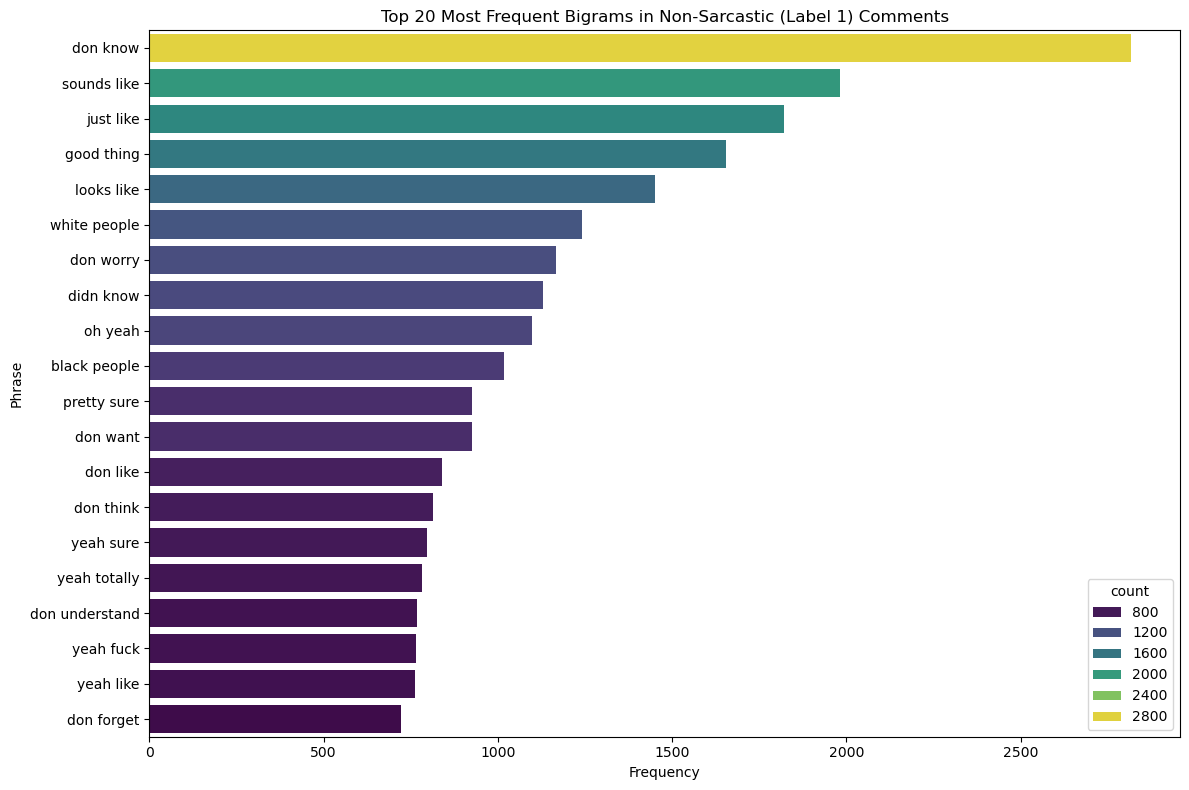

In [33]:
plot_top_bigrams(df_non_sarcastic, label_name="Non-Sarcastic (Label 1)")

Now we can notice quite strong difference between sarcastic and non-sarcastic comments.